# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

## Project Breakdown
- Task 1: Introduction
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- Task 4: Exploring Results (you are here)
- Task 5: Building and Visualizing Interactive Network Graph

## Task 4: Exploring Results

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [22]:
model = Word2Vec.load('Data/w2v.model')

In [23]:
model.wv.most_similar(['orange'], negative=['lemon'],topn=3)

[('gumdrop', 0.414474219083786),
 ('crave', 0.4116426408290863),
 ('jujube', 0.4018630385398865)]

In [24]:
model.wv.most_similar(['orange'], topn=3)

[('tangerine', 0.871921181678772),
 ('lemon', 0.8343267440795898),
 ('clementine', 0.7867265939712524)]

In [25]:
with open('Data/items_for_sale.txt', 'r') as f:
    items_for_sale = f.read().split()
    
items_for_sale

['salt',
 'pepper',
 'fresh',
 'oil',
 'sugar',
 'butter',
 'garlic',
 'cheese',
 'water',
 'lemon',
 'leaves',
 'cloves',
 'powder',
 'chicken',
 'milk',
 'unsalted',
 'eggs',
 'vanilla',
 'egg',
 'vinegar',
 'vegetable',
 'baking',
 'extract',
 'wine',
 'tomatoes',
 'parsley',
 'brown',
 'virgin',
 'cinnamon',
 'chocolate',
 'orange',
 'lime',
 'bread',
 'mustard',
 'seeds',
 'bell',
 'rice',
 'ginger',
 'thyme',
 'cilantro',
 'broth',
 'potatoes',
 'beef',
 'celery',
 'tomato',
 'beans',
 'parmesan',
 'honey',
 'soda',
 'zest',
 'clove',
 'stock',
 'sour',
 'leaf',
 'mushrooms',
 'carrots',
 'syrup',
 'cayenne',
 'bacon',
 'pork',
 'coconut',
 'oregano',
 'mayonnaise',
 'chili',
 'chile',
 'cheddar',
 'seasoning',
 'nutmeg',
 'canola',
 'chips',
 'mint',
 'rosemary',
 'scallions',
 'chives',
 'peanut',
 'breast',
 'cornstarch',
 'almonds',
 'cider',
 'shrimp',
 'shallots',
 'worcestershire',
 'yogurt',
 'walnuts',
 'spinach',
 'cocoa',
 'olives',
 'jalapeno',
 'pineapple',
 'butterm

In [26]:
words, vectors = [], []

for item in items_for_sale:
    try:
        vectors.append(model.wv.get_vector(item))
        words.append(item)
    except KeyError:
        print(f"key error for {item}")

In [27]:
vectors[0]

array([-2.1713035 ,  1.4739733 ,  0.37740606,  1.3366044 , -0.04578982,
        1.1350462 , -0.70300424, -1.3026836 , -1.1656891 ,  0.391031  ,
        0.06377094,  5.1268716 , -4.1614723 , -0.2264992 , -1.5391395 ,
       -0.9470158 , -2.3322098 , -1.6254716 , -3.7271779 ,  3.1086354 ,
        1.3330684 , -0.74994564, -0.23143795, -3.6436446 , -2.1753411 ,
        1.2780732 , -1.1519568 ,  0.80431175,  2.2552645 , -0.29062238,
       -3.193651  , -1.9544084 ,  0.94963676,  1.8758073 , -2.1736155 ,
       -0.39040008, -2.9455314 ,  1.1625155 ,  1.9768082 , -0.10649958,
        0.72577447,  0.04100583,  1.8190495 , -2.3746974 , -0.21926701,
        2.5592058 , -0.43157133,  1.5428236 ,  0.9475955 , -2.6313024 ,
        0.5443908 , -0.13921137, -0.58525527,  4.366777  ,  1.3728406 ,
       -1.021257  , -0.8037404 ,  2.5928369 ,  0.45589918,  1.065591  ,
       -3.790009  ,  4.453682  , -1.5130312 ,  3.2856753 , -0.4396857 ,
       -1.4570653 , -3.8605435 , -1.0113556 ,  0.51652026, -4.10

In [28]:
print(f"len: {len(vectors)}")

len: 911


In [29]:
sims = cosine_similarity(vectors, vectors)

In [30]:
sims.shape

(911, 911)

In [31]:
test_matrix=[[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]
for i in range(len(test_matrix)):
    test_matrix[i][i]=0

print(test_matrix)

[[0, 1, 1, 1], [1, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]


In [32]:
for i in range(len(vectors)):
    sims[i][i] = False

In [33]:
k = 15
indices = list(range(len(vectors)))
indices[:15]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [34]:
random.shuffle(indices)
indices = indices[:k]
indices

[721, 775, 633, 708, 551, 452, 407, 16, 217, 143, 748, 465, 422, 124, 24]

In [35]:
small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]

In [36]:
small_sims = cosine_similarity(small_vectors, small_vectors)

In [37]:
small_sims.shape

(15, 15)

In [38]:
for x in range(len(indices)):
    small_sims[x][x] = False

small_sims

array([[ 0.00000000e+00,  1.12144522e-01,  1.45342678e-01,
         1.79900110e-01,  3.88079919e-02, -9.10376385e-02,
        -6.21055178e-02,  4.48433012e-02, -2.72148498e-03,
         3.91420797e-02,  1.79414079e-01,  2.10686475e-01,
        -1.11363688e-02,  5.42556383e-02,  2.65754431e-01],
       [ 1.12144522e-01,  0.00000000e+00,  3.68112139e-02,
         1.50872126e-01,  1.44499898e-01,  9.22917575e-02,
         1.32562578e-01,  1.31802335e-01,  7.34294727e-02,
        -4.18278687e-02,  7.22875446e-02,  1.07461452e-01,
        -7.93978721e-02,  2.78197415e-02,  1.06079672e-02],
       [ 1.45342678e-01,  3.68112139e-02,  0.00000000e+00,
         4.22724932e-02,  2.84207135e-01,  1.80058219e-02,
        -5.75888418e-02, -4.70978761e-04,  1.90604463e-01,
         3.41469139e-01,  9.66363549e-02,  8.16110820e-02,
         2.76821017e-01, -7.82225572e-04,  2.09776863e-01],
       [ 1.79900110e-01,  1.50872126e-01,  4.22724932e-02,
         0.00000000e+00, -5.59933782e-02,  2.84114450

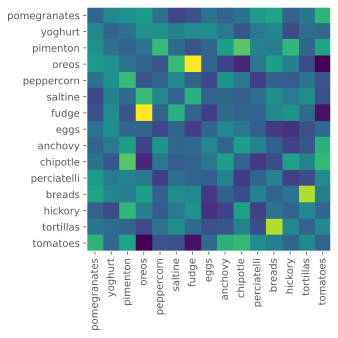

In [39]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()